In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy.stats import f_oneway,pearsonr,chi2_contingency,spearmanr

In [4]:
# importing of our datset

loan_dataset = pd.read_csv('loan_data.csv')

In [62]:
loan_dataset.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [5]:
# checking our dataset datatype

loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [6]:
loan_dataset.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [7]:
# dropping of redundant colum 

loan_dataset.drop(columns = ['loan_status'], inplace = True)

In [8]:

loan_dataset['person_age'] = loan_dataset['person_age'].astype(int)

In [9]:
loan_dataset.iloc[0:10]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
0,22,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No
1,21,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes
2,25,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No
3,23,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No
4,24,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No
5,21,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No
6,26,female,Bachelor,93471.0,1,RENT,35000.0,EDUCATION,12.42,0.37,3.0,701,No
7,24,female,High School,95550.0,5,RENT,35000.0,MEDICAL,11.11,0.37,4.0,585,No
8,24,female,Associate,100684.0,3,RENT,35000.0,PERSONAL,8.90,0.35,2.0,544,No
9,21,female,High School,12739.0,0,OWN,1600.0,VENTURE,14.74,0.13,3.0,640,No


In [10]:
# to check the categories in person_education

loan_dataset['person_education'].unique()

array(['Master', 'High School', 'Bachelor', 'Associate', 'Doctorate'],
      dtype=object)

In [11]:
loan_dataset.shape

(45000, 13)

### VISUALISATION

In [12]:
# steps in hypothesis testing

# set up the hypothesis
ho = 'There is no significant difference between Person_education and previous_loan_defaults_on_file '
h1 = 'There is a significant difference between person_education and previous_loan_defaults_on_file'

# choose level of significance
alpha = 0.05

# setup the decision rule
def decision(p_value:float):

  if p_value < alpha:
    result = h1
  else:
    result = ho
  return f'{result} @ pvalue: {round(p_value, 4)}'

cross_tab = pd.crosstab(loan_dataset['person_education'],loan_dataset['previous_loan_defaults_on_file'])
chi_stats, chi_pvalue, dof, exp = chi2_contingency(cross_tab)

decision(chi_pvalue)

'There is a significant difference between person_education and previous_loan_defaults_on_file @ pvalue: 0.0'

<Axes: xlabel='person_education', ylabel='count'>

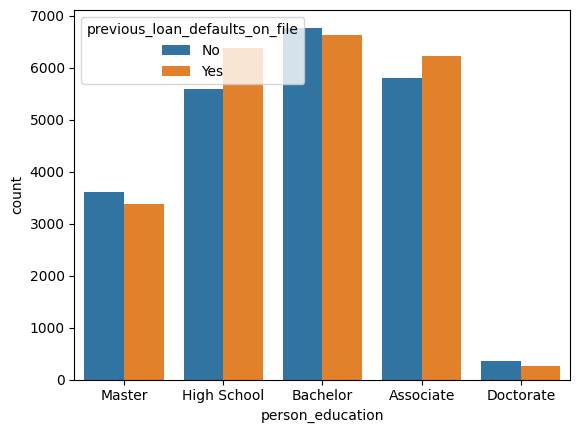

In [13]:

sns.countplot(data=loan_dataset, x ='person_education',hue = 'previous_loan_defaults_on_file',)



## What we are trying to analyse here is how person_education has affected previous_loan_default_on_file:
### Persons in Masters, Bachelor and Doctorate categories have higher chances of returing their loan 

<Axes: xlabel='count', ylabel='loan_intent'>

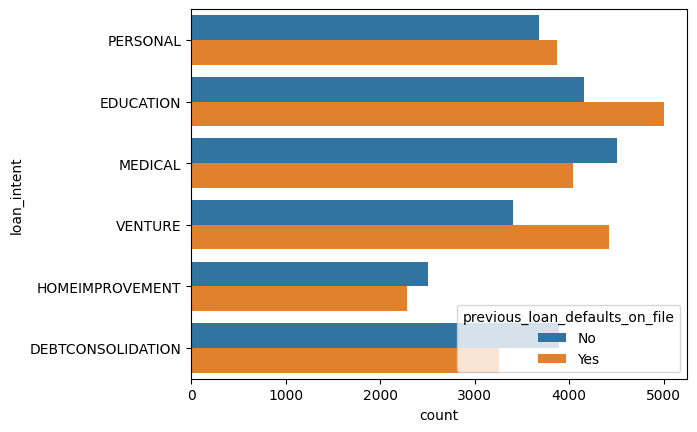

In [ ]:
sns.countplot(data=loan_dataset, y ='loan_intent', hue = 'previous_loan_defaults_on_file')


In [15]:
# steps in hypothesis testing

# set up the hypothesis
ho = 'There is no significant difference between loan_intent and previous_loan_defaults_on_file '
h1 = 'There is a significant difference between loan_intent and previous_loan_defaults_on_file'

# choose level of significance
alpha = 0.05

# setup the decision rule
def decision(p_value:float):

  if p_value < alpha:
    result = h1
  else:
    result = ho
  return f'{result} @ pvalue: {round(p_value, 4)}'

cross_tab = pd.crosstab(loan_dataset['loan_intent'],loan_dataset['previous_loan_defaults_on_file'])
chi_stats, chi_pvalue, dof, exp = chi2_contingency(cross_tab)

decision(chi_pvalue)

'There is a significant difference between loan_intent and previous_loan_defaults_on_file @ pvalue: 0.0'

<Axes: xlabel='previous_loan_defaults_on_file', ylabel='person_income'>

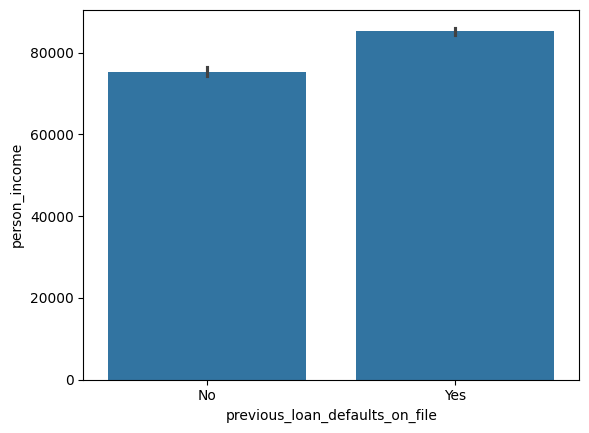

In [16]:
sns.barplot(data=loan_dataset,x='previous_loan_defaults_on_file', y ='person_income',)

<Axes: xlabel='person_home_ownership', ylabel='count'>

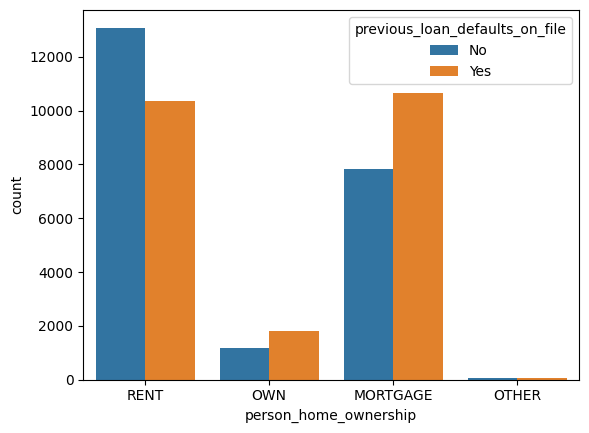

In [34]:
sns.countplot(data=loan_dataset, x ='person_home_ownership',hue= 'previous_loan_defaults_on_file')

T-TESTING FOR THE EXPECTED RELATIONSHIP

In [33]:
# steps in hypothesis testing

# set up the hypothesis
h0 = 'There is no significant difference between person_income across previous_loan_defaults_on_file'
h1 = 'There is a significant difference between person_income across previous_loan_defaults_on_file'

# choose level of significance
alpha = 0.05

# setup the decision rule
def decision(p_value:float):

  if p_value < alpha:
    result = h1
  else:
    result = h0
  return f'{result} @ pvalue: {round(p_value, 4)}'

# compute the test
model = ols(formula = 'person_income ~ previous_loan_defaults_on_file', data=loan_dataset).fit()
anova_table = anova_lm(model)
previous_loan_defaults_on_file_pvalue = anova_table['PR(>F)'].loc['previous_loan_defaults_on_file']

# get conclusion
decision(p_value= previous_loan_defaults_on_file_pvalue)

'There is a significant difference between person_income across previous_loan_defaults_on_file @ pvalue: 0.0'